## Import modules and functions

In [1]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import matplotlib.ticker as ticker

## Specify experiment directory

In [2]:
file2read='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/Antibody Stripping/Longterm_stripping_fabs/longterm_fab_analysis_Silvio/both_Fab_stripping_18_02_2020.CSV' #master folder

## Read csv file containing the final ratios - before/after
- the ratios for each exp are normalized to day 0

In [9]:
df=pd.read_csv(file2read,sep=';',header=None)

In [10]:
df

,0,1,2,3
0,1,0.5320,0.5753,0.7503
1,1,0.6981,0.5425,0.8215
2,1,0.5298,0.5071,0.6431


## Make dataframe with names of experiments, and separate rows for each day

In [11]:
results={"exp number":[],"day":[],"ratio":[]}
for i in range(len(df)):
    for j in range(0,4):
        results["exp number"].append(i)
        results["day"].append(j)
        results["ratio"].append(df.loc[i][j])
df2=pd.DataFrame(results)

## Plot

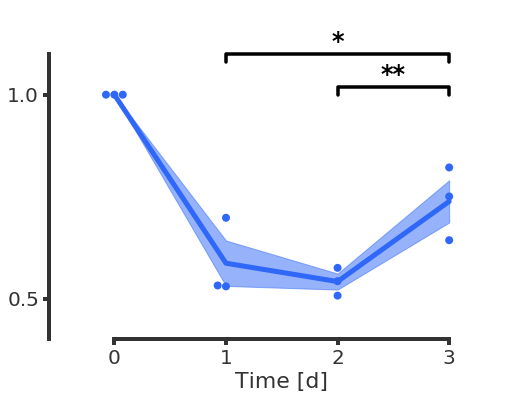

In [54]:
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("ticks")
sns.set_palette("Set2")

fig=plt.figure(figsize=(8,6))
g=sns.swarmplot(x="day",y="ratio",data=df2,color='#2F67F8',size=8)
g=sns.lineplot(x="day",y="ratio",data=df2,linewidth=5,color='#2F67F8',ci=None)
means=[]
sems=[]
for i in range(0,8):
    means.append(df2[df2["day"]==i]["ratio"].mean())
    sems.append(df2[df2["day"]==i]["ratio"].sem())

x=np.arange(0,8,1)
y=np.array(means)
yerr=np.array(sems)
plt.fill_between(x, y-yerr, y+yerr,
    alpha=0.5, edgecolor='#2F67F8', facecolor='#2F67F8')

    
g.tick_params(width=4,color='#333333')
g.set_xlabel('Time [d]',color='#333333',fontsize=22)
g.set_ylabel("",
    color='black',alpha=.7,fontsize=22,weight='bold')
plt.ylim([0.4,1.2])
g.grid(False)
plt.rcParams['font.sans-serif'] = 'Helvetica'
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":False,"right":False}
sns.despine(ax=g,right=True,top=True,trim=trims,offset=offsets)
plt.title('')
plt.locator_params(axis='y', nbins=5)
plt.xticks(visible=True,color='#333333',fontsize=20)
plt.yticks([0.5,1],color='#333333',fontsize=20)


x1, x2 = 1,3
y=1.08
h=0.02
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col,size=24, weight='bold')

x1, x2 = 2,3
y= 1
h=0.02
col='black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3.5, c=col)
plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom', color=col,size=24, weight='bold')


diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
fig.savefig(diri+'longterm_fab_stripping.svg', bbox_inches='tight', format='svg')

## Stats - ttest between normalized ratios

Day3

In [18]:
arrayexps=np.stack([df2[df2["exp number"]==0]["ratio"].values/df2[df2["exp number"]==0]["ratio"].values[3],
                   df2[df2["exp number"]==1]["ratio"].values/df2[df2["exp number"]==1]["ratio"].values[3],
                   df2[df2["exp number"]==2]["ratio"].values/df2[df2["exp number"]==2]["ratio"].values[3],
                   df2[df2["exp number"]==3]["ratio"].values/df2[df2["exp number"]==3]["ratio"].values[3]])
[stat,pval]=stats.ttest_rel(arrayexps[:,3], arrayexps[:,2])
print(pval)

0.010873325146167612


Day6

In [20]:
arrayexps=np.stack([df2[df2["exp number"]==0]["ratio"].values/df2[df2["exp number"]==0]["ratio"].values[6],
                   df2[df2["exp number"]==1]["ratio"].values/df2[df2["exp number"]==1]["ratio"].values[6],
                   df2[df2["exp number"]==2]["ratio"].values/df2[df2["exp number"]==2]["ratio"].values[6],
                   df2[df2["exp number"]==3]["ratio"].values/df2[df2["exp number"]==3]["ratio"].values[6]])
[stat,pval]=stats.ttest_rel(arrayexps[:,6], arrayexps[:,4])
print(pval)

0.027177344247064698
